In [1]:
%%HTML
<h1>Import Data</h1>

In [2]:
import pandas as pd
df1 = pd.read_csv('./data/210730_HNX_ALL.txt', sep = ',')
df2 = pd.read_csv('./data/210730_HOSE_ALL.txt', sep = ',')

frames = [df1, df2]
df = pd.concat(frames, ignore_index = True)
print(df.shape)
df.head()

(1436020, 7)


,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,AAV,20210730,12.4,12.4,12.1,12.4,166400
1,ABT,20210730,26.0,27.2,26.0,27.1,1207
2,ACM,20210730,2.3,2.4,2.3,2.4,592463
3,ADC,20210730,21.5,21.5,21.5,21.5,0
4,ALT,20210730,12.7,12.7,12.7,12.7,0


In [3]:
%%HTML
<h1>Extract Data</h1>

In [4]:
# Remove redundant characters
df.columns=df.columns.str.replace('[<,>]','', regex=True)

# Drop duplicate records
df_modified = df.drop_duplicates(subset = ['Ticker', 'DTYYYYMMDD'], keep = 'first')
print(df_modified.shape)

# Change date data type
df_modified["DTYYYYMMDD"] = pd.to_datetime(df_modified["DTYYYYMMDD"], format='%Y%m%d')
df_modified.head()

(1436020, 7)


,Ticker,DTYYYYMMDD,Open,High,Low,Close,Volume
0,AAV,2021-07-30,12.4,12.4,12.1,12.4,166400
1,ABT,2021-07-30,26.0,27.2,26.0,27.1,1207
2,ACM,2021-07-30,2.3,2.4,2.3,2.4,592463
3,ADC,2021-07-30,21.5,21.5,21.5,21.5,0
4,ALT,2021-07-30,12.7,12.7,12.7,12.7,0


In [5]:
#Pivot the table
pricing = df_modified.pivot(index='DTYYYYMMDD', columns='Ticker', values = 'Close')
print(pricing.shape)
pricing.head()

(2390, 750)


Ticker,AAA,AAM,AAT,AAV,ABS,ABT,ACB,ACC,ACL,ACM,...,VTJ,VTL,VTO,VTV,VXB,WCS,WSS,X20,YBM,YEG
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2012-01-03,2.950,8.336,NaN,NaN,NaN,13.371,5.760,5.259,5.411,NaN,...,NaN,15.657,1.707,1.224,3.521,14.96,3.1,NaN,NaN,NaN
2012-01-04,2.976,8.487,NaN,NaN,NaN,13.409,5.760,5.289,5.349,NaN,...,NaN,15.657,1.707,1.269,3.521,14.96,2.9,NaN,NaN,NaN
2012-01-05,2.950,8.374,NaN,NaN,NaN,13.669,5.939,5.053,5.349,NaN,...,NaN,15.657,1.666,1.269,3.298,14.96,2.9,NaN,NaN,NaN
2012-01-06,2.925,8.374,NaN,NaN,NaN,13.036,5.819,5.289,5.349,NaN,...,NaN,15.657,1.626,1.269,3.164,14.96,2.8,NaN,NaN,NaN
2012-01-09,2.950,8.374,NaN,NaN,NaN,13.036,5.790,5.289,5.349,NaN,...,NaN,15.657,1.666,1.291,3.030,14.96,2.8,NaN,NaN,NaN


In [6]:
# Zero value in the dataframe can cause divide-by-zero error during calculation, we should check for them
0 in pricing.values

True

In [7]:
# Replace zero with N/A
import numpy as np
pricing.replace(0, np.nan, inplace=True)

In [8]:
0 in pricing.values

False

In [9]:
# Save a copy of the raw pricing dataframe for future references
unclean_pricing = pricing.copy()

In [10]:
%%HTML
<h1>Filter Pricing</h1>

In [11]:
%%HTML
<h3>Here we only consider pricing between 01/01/2015 and 31/12/2018 (a total of 999 days)</h3>

In [12]:
import datetime
start_date = datetime.date(2015, 1, 1)
end_date = datetime.date(2018, 12, 31)
pricing = pricing.loc[start_date:end_date]
print(pricing.shape)
pricing.head()

(999, 750)


Ticker,AAA,AAM,AAT,AAV,ABS,ABT,ACB,ACC,ACL,ACM,...,VTJ,VTL,VTO,VTV,VXB,WCS,WSS,X20,YBM,YEG
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2015-01-05,6.223,7.485,NaN,NaN,NaN,31.261,4.991,14.233,4.147,NaN,...,NaN,11.92,4.526,6.860,11.637,82.363,5.2,NaN,NaN,NaN
2015-01-06,6.314,7.433,NaN,NaN,NaN,31.261,5.056,13.758,4.147,NaN,...,NaN,11.92,4.744,6.890,11.637,76.315,5.4,NaN,NaN,NaN
2015-01-07,6.539,7.485,NaN,NaN,NaN,30.968,5.121,13.370,4.328,NaN,...,NaN,11.92,4.799,6.978,11.637,73.488,5.3,NaN,NaN,NaN
2015-01-08,6.404,7.537,NaN,NaN,NaN,32.137,5.154,13.370,4.328,NaN,...,NaN,11.92,4.799,7.508,11.637,73.488,5.3,NaN,NaN,NaN
2015-01-09,6.269,7.069,NaN,NaN,NaN,33.890,5.187,14.060,4.292,NaN,...,NaN,11.92,4.908,7.508,11.637,73.431,5.4,NaN,NaN,NaN


In [13]:
%%HTML
<h1>Clean Data</h1>

In [14]:
pd.set_option('display.precision', 3)

In [15]:
#Check for missing values
pricing.isnull().values.any()

True

<AxesSubplot:>

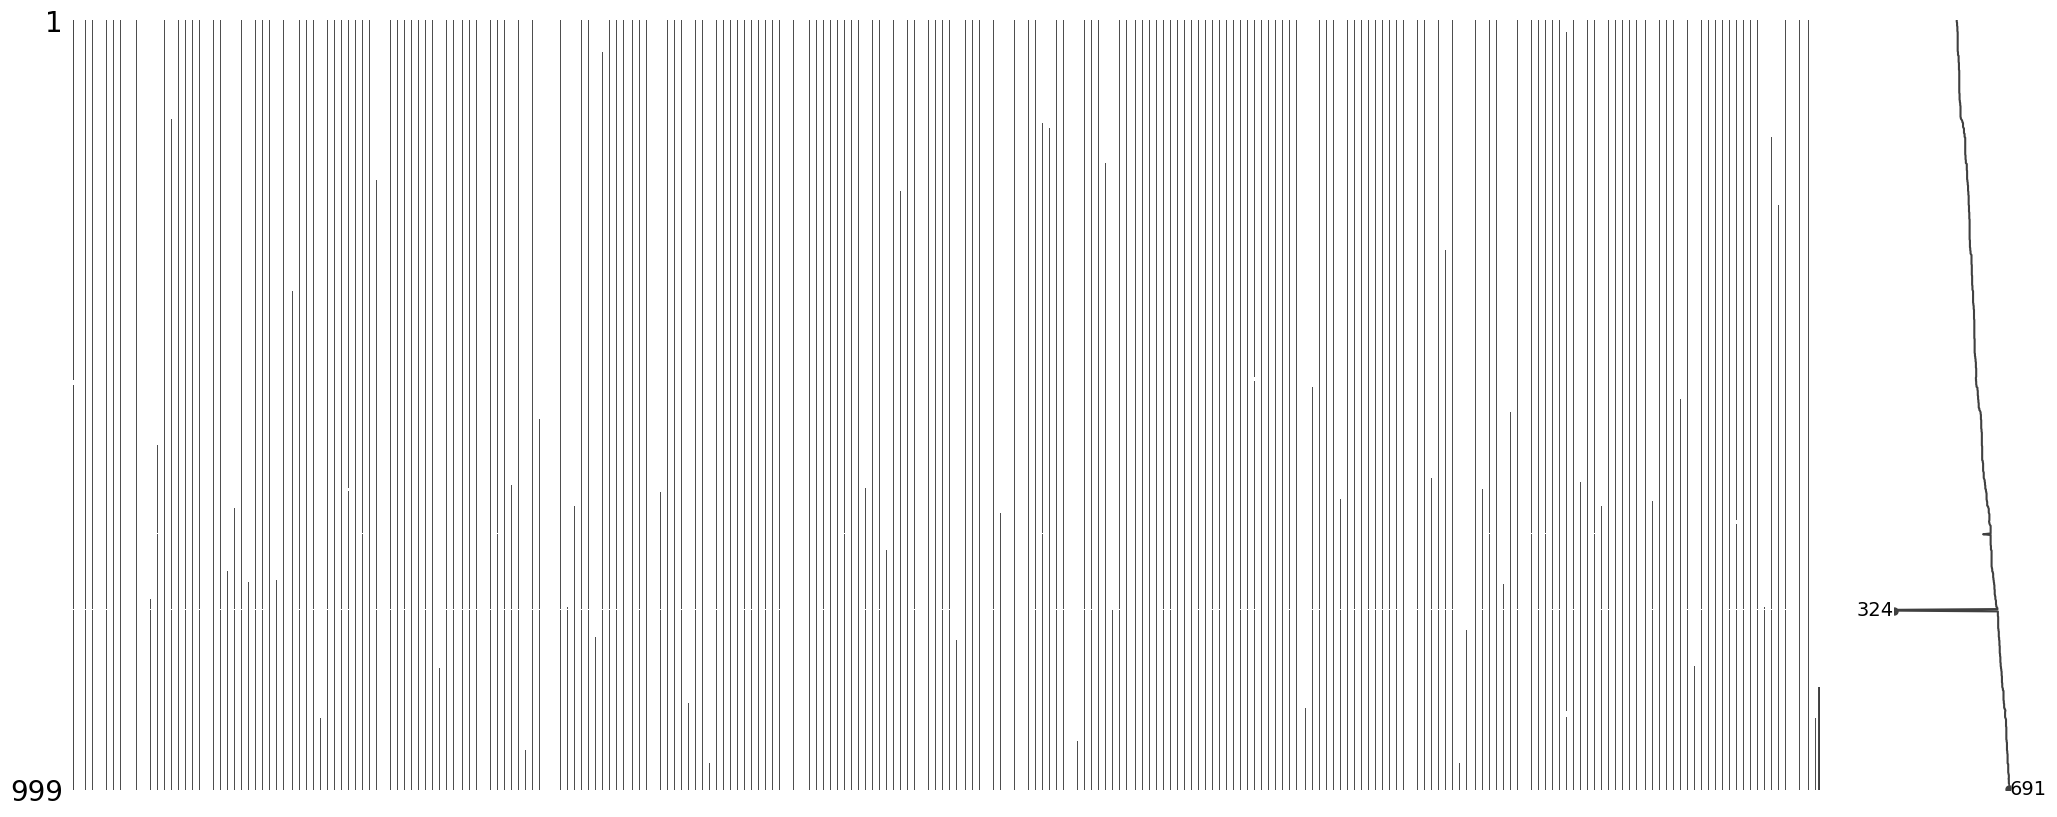

In [16]:
#Plot the missing value matrix
import missingno
missingno.matrix(pricing)

In [17]:
%%HTML
<h3>We shall remove all the stocks with more than 20% of missing data</h3>

In [18]:
print('Pricing Shape before cleaning =', pricing.shape)

missing_percentage = pricing.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
pricing.drop(labels=dropped_list, axis=1, inplace=True)

print('Pricing Shape after cleaning =', pricing.shape)

Pricing Shape before cleaning = (999, 750)
Pricing Shape after cleaning = (999, 556)


In [19]:
#Fill the remaining missing values with already available values
pricing = pricing.fillna(method='ffill')
pricing = pricing.fillna(method='bfill')
print(pricing.shape)
pricing.head()

(999, 556)


Ticker,AAA,AAM,ABT,ACB,ACC,ACL,ACM,ADC,AGM,AGR,...,VSH,VSI,VTB,VTH,VTL,VTO,VTV,VXB,WCS,WSS
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2015-01-05,6.223,7.485,31.261,4.991,14.233,4.147,10.022,7.491,7.538,6.2,...,9.075,6.284,6.694,11.108,11.92,4.526,6.860,11.637,82.363,5.2
2015-01-06,6.314,7.433,31.261,5.056,13.758,4.147,10.022,7.325,7.538,6.2,...,9.142,5.895,6.527,11.326,11.92,4.744,6.890,11.637,76.315,5.4
2015-01-07,6.539,7.485,30.968,5.121,13.370,4.328,10.022,7.325,7.538,6.3,...,9.142,6.229,6.471,11.326,11.92,4.799,6.978,11.637,73.488,5.3
2015-01-08,6.404,7.537,32.137,5.154,13.370,4.328,10.022,7.325,7.210,6.3,...,9.009,5.839,6.917,11.326,11.92,4.799,7.508,11.637,73.488,5.3
2015-01-09,6.269,7.069,33.890,5.187,14.060,4.292,10.022,7.558,7.472,6.4,...,9.075,5.839,7.141,11.544,11.92,4.908,7.508,11.637,73.431,5.4


In [20]:
# Calculate returns and create a data frame
returns = pricing.pct_change()

returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns.dropna(inplace=True)

print(returns.shape)
returns.head()

(998, 556)


Ticker,AAA,AAM,ABT,ACB,ACC,ACL,ACM,ADC,AGM,AGR,...,VSH,VSI,VTB,VTH,VTL,VTO,VTV,VXB,WCS,WSS
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2015-01-06,0.015,-0.007,0.000,0.013,-0.033,0.000,0.0,-0.022,0.000,0.000,...,0.007,-0.062,-0.025,0.020,0.0,0.048,0.004,0.0,-7.343e-02,0.038
2015-01-07,0.036,0.007,-0.009,0.013,-0.028,0.044,0.0,0.000,0.000,0.016,...,0.000,0.057,-0.009,0.000,0.0,0.012,0.013,0.0,-3.704e-02,-0.019
2015-01-08,-0.021,0.007,0.038,0.006,0.000,0.000,0.0,0.000,-0.044,0.000,...,-0.015,-0.063,0.069,0.000,0.0,0.000,0.076,0.0,0.000e+00,0.000
2015-01-09,-0.021,-0.062,0.055,0.006,0.052,-0.008,0.0,0.032,0.036,0.016,...,0.007,0.000,0.032,0.019,0.0,0.023,0.000,0.0,-7.756e-04,0.019
2015-01-12,-0.029,0.059,-0.034,0.013,0.000,-0.008,0.0,0.000,0.018,-0.016,...,-0.007,-0.067,0.000,-0.050,0.0,-0.033,0.000,0.0,-1.463e-02,-0.037


In [21]:
# We won't be needing the datetime index so let's drop it
returns = returns.reset_index()
returns = returns.drop(['DTYYYYMMDD'], axis=1)
returns.head()

Ticker,AAA,AAM,ABT,ACB,ACC,ACL,ACM,ADC,AGM,AGR,...,VSH,VSI,VTB,VTH,VTL,VTO,VTV,VXB,WCS,WSS
0,0.015,-0.007,0.000,0.013,-0.033,0.000,0.0,-0.022,0.000,0.000,...,0.007,-0.062,-0.025,0.020,0.0,0.048,0.004,0.0,-7.343e-02,0.038
1,0.036,0.007,-0.009,0.013,-0.028,0.044,0.0,0.000,0.000,0.016,...,0.000,0.057,-0.009,0.000,0.0,0.012,0.013,0.0,-3.704e-02,-0.019
2,-0.021,0.007,0.038,0.006,0.000,0.000,0.0,0.000,-0.044,0.000,...,-0.015,-0.063,0.069,0.000,0.0,0.000,0.076,0.0,0.000e+00,0.000
3,-0.021,-0.062,0.055,0.006,0.052,-0.008,0.0,0.032,0.036,0.016,...,0.007,0.000,0.032,0.019,0.0,0.023,0.000,0.0,-7.756e-04,0.019
4,-0.029,0.059,-0.034,0.013,0.000,-0.008,0.0,0.000,0.018,-0.016,...,-0.007,-0.067,0.000,-0.050,0.0,-0.033,0.000,0.0,-1.463e-02,-0.037


In [22]:
from scipy.fft import fft

# Apply Fourier Transform to each column (stock) in the DataFrame
fft_features = pd.concat([pd.Series(np.abs(fft(returns[column].values)), name=column) for column in returns.columns], axis=1)

print(fft_features.shape)
fft_features.head()

(998, 556)


,AAA,AAM,ABT,ACB,ACC,ACL,ACM,ADC,AGM,AGR,...,VSH,VSI,VTB,VTH,VTL,VTO,VTV,VXB,WCS,WSS
0,1.011,0.608,0.340,1.212,0.191,1.426,1.352,0.815,0.626,0.219,...,0.624,1.680,1.367,0.258,1.074,0.349,0.636,0.538,0.302,0.195
1,1.437,0.228,0.559,0.611,0.410,1.289,0.717,0.568,0.316,1.349,...,0.094,0.502,0.154,0.167,1.235,0.278,0.838,1.048,0.534,0.581
2,0.787,0.349,0.473,0.642,0.596,1.080,0.711,0.724,0.483,1.184,...,0.272,0.376,0.574,0.772,1.367,0.745,0.139,0.670,0.102,1.285
3,1.170,0.376,0.344,0.765,0.548,1.356,1.767,0.630,0.557,0.735,...,0.224,1.222,0.160,0.395,1.318,0.611,0.492,0.806,0.271,0.496
4,1.082,0.273,0.307,0.604,0.227,0.957,0.964,0.254,0.233,0.214,...,0.171,0.675,0.716,0.901,1.165,0.377,0.830,0.976,0.296,0.298


In [23]:
# Transpose the fft dataframe for easy merging later
fft_features_transpose = fft_features.transpose()
print(fft_features_transpose.shape)
fft_features_transpose.head()

(556, 998)


,0,1,2,3,4,5,6,7,8,9,...,988,989,990,991,992,993,994,995,996,997
AAA,1.011,1.437,0.787,1.170,1.082,0.535,0.331,0.180,0.677,0.239,...,0.241,0.239,0.677,0.180,0.331,0.535,1.082,1.170,0.787,1.437
AAM,0.608,0.228,0.349,0.376,0.273,0.147,0.521,0.185,0.107,0.104,...,0.417,0.104,0.107,0.185,0.521,0.147,0.273,0.376,0.349,0.228
ABT,0.340,0.559,0.473,0.344,0.307,0.573,0.565,0.429,0.137,0.476,...,0.437,0.476,0.137,0.429,0.565,0.573,0.307,0.344,0.473,0.559
ACB,1.212,0.611,0.642,0.765,0.604,0.452,0.299,0.730,0.241,0.661,...,1.181,0.661,0.241,0.730,0.299,0.452,0.604,0.765,0.642,0.611
ACC,0.191,0.410,0.596,0.548,0.227,0.174,0.512,0.094,0.449,0.470,...,0.686,0.470,0.449,0.094,0.512,0.174,0.227,0.548,0.596,0.410


In [24]:
%%HTML
<h1>Customized Features</h1>

In [25]:
%%HTML
<h3>We will be adding some pre-knowledge features as well to make the model more robust</h3>

In [26]:
#Calculate mean returns and create a data frame
mean_returns = pricing.pct_change().mean()*998 
mean_returns = pd.DataFrame(mean_returns)
mean_returns.columns = ['mean returns']

#Calculate the volatility
mean_returns['volatility'] = pricing.pct_change().std()*np.sqrt(998)

print(mean_returns.shape)
mean_returns.head()

(556, 2)


,mean returns,volatility
Ticker,,
AAA,1.011,0.748
AAM,0.608,0.898
ABT,0.340,0.710
ACB,1.212,0.601
ACC,0.191,0.727


In [27]:
# Create a merged numerical value dataframe
num_data = pd.concat([fft_features_transpose, mean_returns], axis=1)
print(num_data.shape)
num_data.head()

(556, 1000)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,mean returns,volatility
AAA,1.011,1.437,0.787,1.170,1.082,0.535,0.331,0.180,0.677,0.239,...,0.677,0.180,0.331,0.535,1.082,1.170,0.787,1.437,1.011,0.748
AAM,0.608,0.228,0.349,0.376,0.273,0.147,0.521,0.185,0.107,0.104,...,0.107,0.185,0.521,0.147,0.273,0.376,0.349,0.228,0.608,0.898
ABT,0.340,0.559,0.473,0.344,0.307,0.573,0.565,0.429,0.137,0.476,...,0.137,0.429,0.565,0.573,0.307,0.344,0.473,0.559,0.340,0.710
ACB,1.212,0.611,0.642,0.765,0.604,0.452,0.299,0.730,0.241,0.661,...,0.241,0.730,0.299,0.452,0.604,0.765,0.642,0.611,1.212,0.601
ACC,0.191,0.410,0.596,0.548,0.227,0.174,0.512,0.094,0.449,0.470,...,0.449,0.094,0.512,0.174,0.227,0.548,0.596,0.410,0.191,0.727


In [28]:
from sklearn import preprocessing
scaled_data = preprocessing.StandardScaler().fit_transform(num_data)

scaled_data_df = pd.DataFrame(scaled_data, columns=[f'SS{i+1}' for i in range(1000)], index = mean_returns.index)
print(scaled_data_df.shape)
scaled_data_df.head()

(556, 1000)


C:\Users\Trung\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Trung\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,SS1,SS2,SS3,SS4,SS5,SS6,SS7,SS8,SS9,SS10,...,SS991,SS992,SS993,SS994,SS995,SS996,SS997,SS998,SS999,SS1000
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,-0.057,-0.050,-0.058,-0.053,-0.054,-0.062,-0.064,-0.066,-0.059,-0.066,...,-0.059,-0.066,-0.064,-0.062,-0.054,-0.053,-0.058,-0.050,-0.055,-0.061
AAM,-0.063,-0.066,-0.064,-0.064,-0.065,-0.067,-0.062,-0.066,-0.067,-0.067,...,-0.067,-0.066,-0.062,-0.067,-0.065,-0.064,-0.064,-0.066,-0.061,-0.059
ABT,-0.066,-0.062,-0.062,-0.064,-0.064,-0.061,-0.061,-0.063,-0.067,-0.062,...,-0.067,-0.063,-0.061,-0.061,-0.064,-0.064,-0.062,-0.062,-0.064,-0.062
ACB,-0.055,-0.061,-0.060,-0.058,-0.060,-0.063,-0.065,-0.059,-0.065,-0.060,...,-0.065,-0.059,-0.065,-0.063,-0.060,-0.058,-0.060,-0.061,-0.052,-0.063
ACC,-0.068,-0.064,-0.060,-0.061,-0.065,-0.067,-0.062,-0.067,-0.062,-0.063,...,-0.062,-0.067,-0.062,-0.067,-0.065,-0.061,-0.060,-0.064,-0.066,-0.062


In [29]:
# Importing the sector
sector = pd.read_excel('./data/sector.xlsx', index_col=0)
print(sector.head())

# Importing the marketcap
marketcap = pd.read_excel('./data/marketcap.xlsx', index_col=0)
print(marketcap.head())

                           Sector
Ticker                           
AAA              industrial_goods
AAM                   agriculture
AAT                consumer_goods
AAV      real_estate_construction
ABS     basic_materials_resources
         Marketcap
Ticker            
AAA     Medium Cap
AAM      Micro Cap
AAT      Small Cap
AAV      Micro Cap
ABR      Micro Cap


In [30]:
# Integrate the two categorical features to the dataframe
merged_df = pd.merge(scaled_data_df, sector, on='Ticker', how = 'left').merge(marketcap, on='Ticker', how = 'left')
print(merged_df.shape)
merged_df.head()

(556, 1002)


,SS1,SS2,SS3,SS4,SS5,SS6,SS7,SS8,SS9,SS10,...,SS993,SS994,SS995,SS996,SS997,SS998,SS999,SS1000,Sector,Marketcap
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,-0.057,-0.050,-0.058,-0.053,-0.054,-0.062,-0.064,-0.066,-0.059,-0.066,...,-0.064,-0.062,-0.054,-0.053,-0.058,-0.050,-0.055,-0.061,industrial_goods,Medium Cap
AAM,-0.063,-0.066,-0.064,-0.064,-0.065,-0.067,-0.062,-0.066,-0.067,-0.067,...,-0.062,-0.067,-0.065,-0.064,-0.064,-0.066,-0.061,-0.059,agriculture,Micro Cap
ABT,-0.066,-0.062,-0.062,-0.064,-0.064,-0.061,-0.061,-0.063,-0.067,-0.062,...,-0.061,-0.061,-0.064,-0.064,-0.062,-0.062,-0.064,-0.062,consumer_goods,Small Cap
ACB,-0.055,-0.061,-0.060,-0.058,-0.060,-0.063,-0.065,-0.059,-0.065,-0.060,...,-0.065,-0.063,-0.060,-0.058,-0.060,-0.061,-0.052,-0.063,financial_services,Large Cap
ACC,-0.068,-0.064,-0.060,-0.061,-0.065,-0.067,-0.062,-0.067,-0.062,-0.063,...,-0.062,-0.067,-0.065,-0.061,-0.060,-0.064,-0.066,-0.062,real_estate_construction,Small Cap


In [31]:
# Drop stocks with empty Sector and/or Marketcap
completed_df = merged_df.dropna(subset=['Sector', 'Marketcap'])
print(completed_df.shape)
completed_df.head()

(517, 1002)


,SS1,SS2,SS3,SS4,SS5,SS6,SS7,SS8,SS9,SS10,...,SS993,SS994,SS995,SS996,SS997,SS998,SS999,SS1000,Sector,Marketcap
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,-0.057,-0.050,-0.058,-0.053,-0.054,-0.062,-0.064,-0.066,-0.059,-0.066,...,-0.064,-0.062,-0.054,-0.053,-0.058,-0.050,-0.055,-0.061,industrial_goods,Medium Cap
AAM,-0.063,-0.066,-0.064,-0.064,-0.065,-0.067,-0.062,-0.066,-0.067,-0.067,...,-0.062,-0.067,-0.065,-0.064,-0.064,-0.066,-0.061,-0.059,agriculture,Micro Cap
ABT,-0.066,-0.062,-0.062,-0.064,-0.064,-0.061,-0.061,-0.063,-0.067,-0.062,...,-0.061,-0.061,-0.064,-0.064,-0.062,-0.062,-0.064,-0.062,consumer_goods,Small Cap
ACB,-0.055,-0.061,-0.060,-0.058,-0.060,-0.063,-0.065,-0.059,-0.065,-0.060,...,-0.065,-0.063,-0.060,-0.058,-0.060,-0.061,-0.052,-0.063,financial_services,Large Cap
ACC,-0.068,-0.064,-0.060,-0.061,-0.065,-0.067,-0.062,-0.067,-0.062,-0.063,...,-0.062,-0.067,-0.065,-0.061,-0.060,-0.064,-0.066,-0.062,real_estate_construction,Small Cap


In [32]:
# One hot encoded the Sector and Marketcap
X = pd.get_dummies(completed_df, columns=['Sector', 'Marketcap'])
print(X.shape)
X.head()

(517, 1020)


,SS1,SS2,SS3,SS4,SS5,SS6,SS7,SS8,SS9,SS10,...,Sector_media_entertainment,Sector_real_estate_construction,Sector_retail_wholesale,Sector_technology,Sector_transportation_logistics,Sector_utilities,Marketcap_Large Cap,Marketcap_Medium Cap,Marketcap_Micro Cap,Marketcap_Small Cap
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,-0.057,-0.050,-0.058,-0.053,-0.054,-0.062,-0.064,-0.066,-0.059,-0.066,...,0,0,0,0,0,0,0,1,0,0
AAM,-0.063,-0.066,-0.064,-0.064,-0.065,-0.067,-0.062,-0.066,-0.067,-0.067,...,0,0,0,0,0,0,0,0,1,0
ABT,-0.066,-0.062,-0.062,-0.064,-0.064,-0.061,-0.061,-0.063,-0.067,-0.062,...,0,0,0,0,0,0,0,0,0,1
ACB,-0.055,-0.061,-0.060,-0.058,-0.060,-0.063,-0.065,-0.059,-0.065,-0.060,...,0,0,0,0,0,0,1,0,0,0
ACC,-0.068,-0.064,-0.060,-0.061,-0.065,-0.067,-0.062,-0.067,-0.062,-0.063,...,0,1,0,0,0,0,0,0,0,1


In [33]:
%%HTML
<h1>KMeans Clustering</h1>

In [34]:
%%HTML
<h3>Hypermeters Tuning</h3>

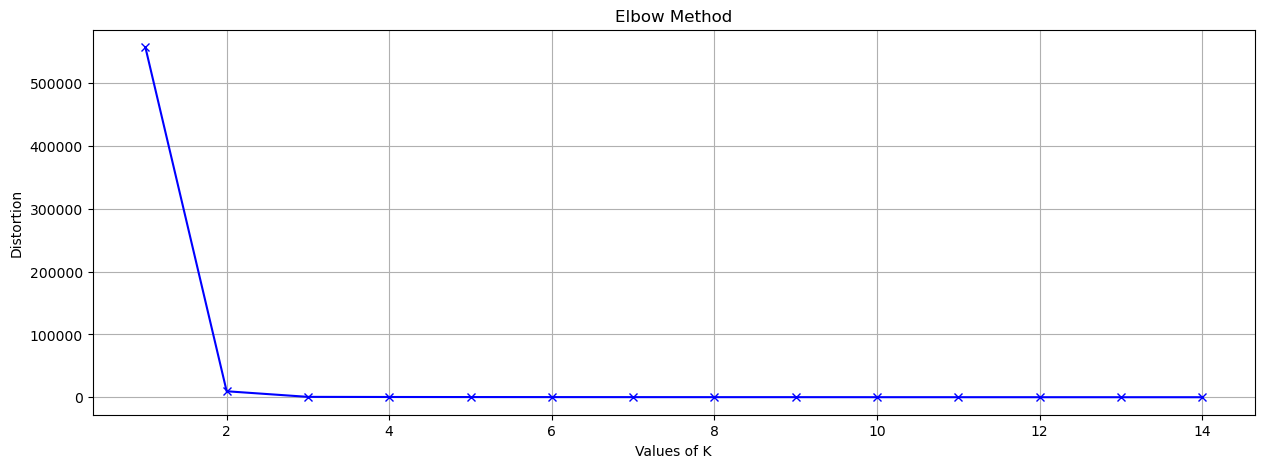

In [35]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

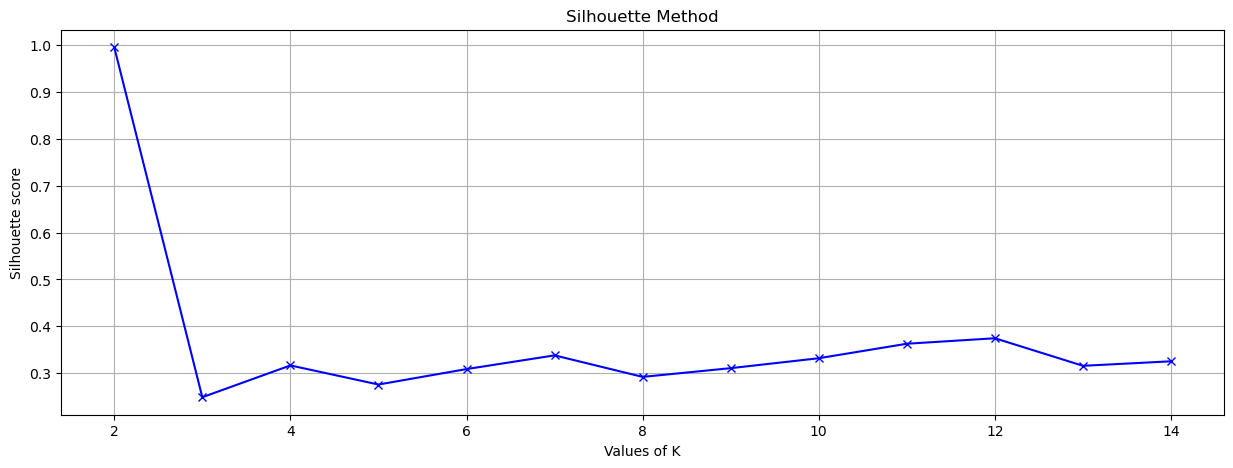

In [36]:
from sklearn.metrics import silhouette_score

#For the silhouette method k needs to start from 2
K = range(2,15)
silhouettes = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

In [37]:
%%HTML
<h3>Clustering</h3>

In [38]:
c = 14
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)
labels = k_means.labels_
clustered = k_means.labels_

In [39]:
%%HTML
<h3>Evaluation Metrics</h3>

In [40]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz_score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz_score)

# Davies-Bouldin Index
davies_bouldin_score = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin_score)

Silhouette Score: 0.4600859205746498
Calinski-Harabasz Index: 89905.58833579962
Davies-Bouldin Index: 0.9583372527414029


In [41]:
%%HTML
<h1>Cluster Visualization</h1>

In [42]:
# the initial dimensionality of the search was
ticker_count = len(returns.columns)
print("Total pairs possible in universe: %d " % (ticker_count*(ticker_count-1)/2))

Total pairs possible in universe: 154290 


In [43]:
clustered_series = pd.Series(index=completed_df.index, data=clustered.flatten())
clustered_series_all = pd.Series(index=completed_df.index, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

In [44]:
from sklearn.manifold import TSNE
X_tsne = TSNE(init = "random", learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

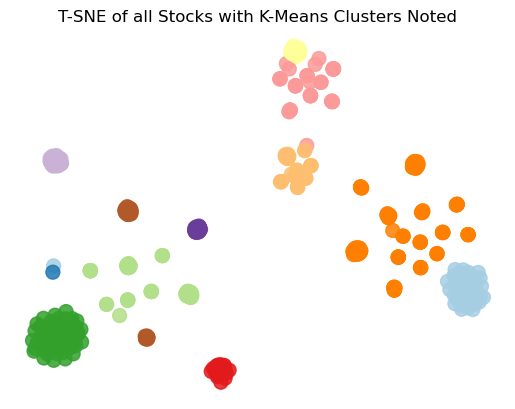

In [45]:
import matplotlib.cm as cm
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')
plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with K-Means Clusters Noted');

Text(0, 0.5, 'Cluster Number')

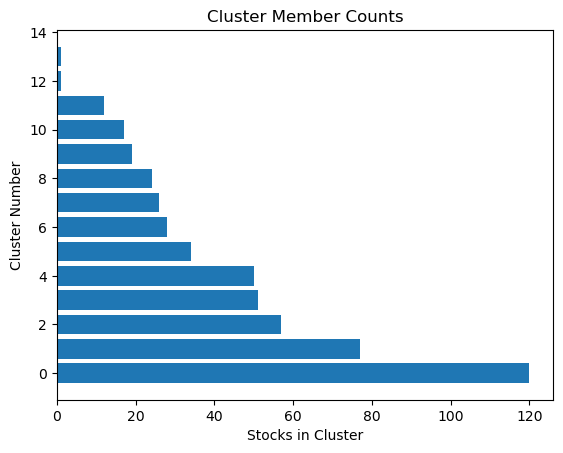

In [46]:
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')

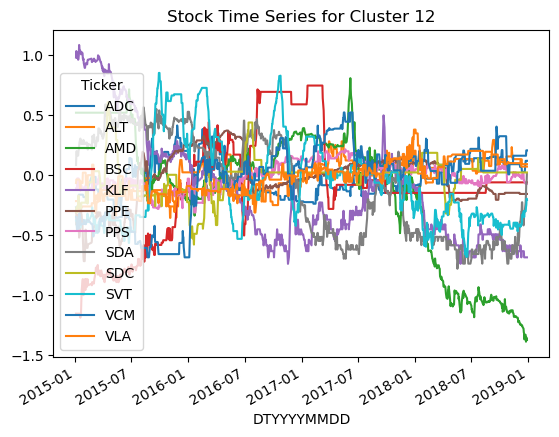

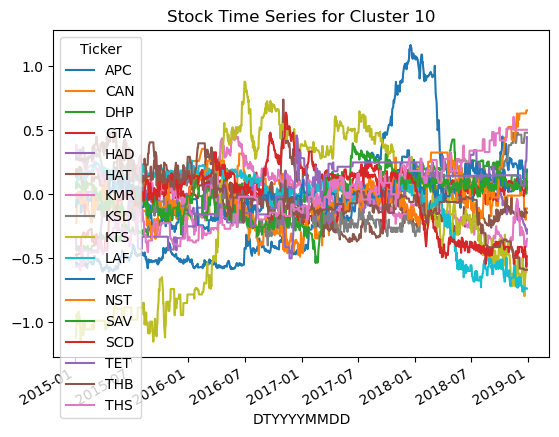

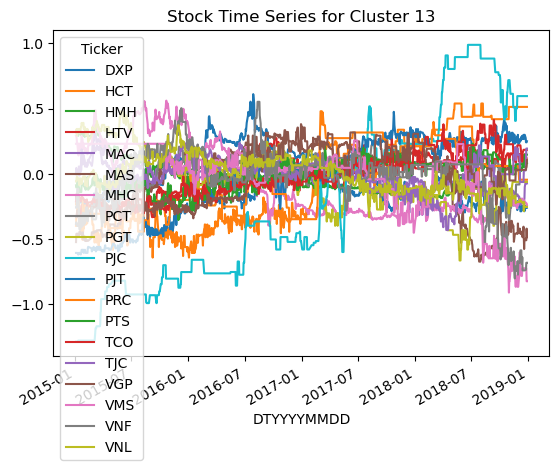

In [47]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]

# plot a handful of the smallest clusters
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 3)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(pricing[tickers].mean())
    datas = np.log(pricing[tickers]).sub(means)
    datas.plot(title='Stock Time Series for Cluster %d' % clust)

In [48]:
%%HTML
<h1>Pair Selection</h1>

In [49]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 12
Pairs to evaluate: 32150


In [50]:
%%HTML
<h3>Cointegration and pair selection function</h3>

In [51]:
from statsmodels.tsa.stattools import coint
def find_cointegrated_pairs(data, significance=0.01):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading   
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [52]:
cluster_dict = {}

for i, which_clust in enumerate(ticker_count_reduced.index):
    # test for cointegration
    tickers = clustered_series[clustered_series == which_clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(pricing[tickers])
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs
    
    # check for the most optimal pair in each clusters
    best_pair = None
    min_pvalue = 9999
    
    for pair in pairs:
        pvalue = pvalue_matrix[tickers.get_loc(pair[0]), tickers.get_loc(pair[1])]
        if pvalue < min_pvalue:
            best_pair = pair
            min_pvalue = pvalue

    print("Best pair for cluster", which_clust, ":", best_pair)
    print("Minimum p-value for cluster", which_clust, ":", min_pvalue)

Best pair for cluster 8 : ('CLW', 'DHT')
Minimum p-value for cluster 8 : 1.7223136067394622e-11
Best pair for cluster 4 : ('SC5', 'V12')
Minimum p-value for cluster 4 : 2.538150617158732e-07
Best pair for cluster 0 : ('HTI', 'VC7')
Minimum p-value for cluster 0 : 6.0194513175892114e-05
Best pair for cluster 3 : ('HEV', 'PSC')
Minimum p-value for cluster 3 : 8.277940766508766e-06
Best pair for cluster 5 : ('OGC', 'TCM')
Minimum p-value for cluster 5 : 0.0004712178243562158
Best pair for cluster 7 : ('KDH', 'PNJ')
Minimum p-value for cluster 7 : 0.00011184184958455087
Best pair for cluster 6 : ('ITQ', 'TNT')
Minimum p-value for cluster 6 : 6.217486354642999e-09
Best pair for cluster 9 : ('BBS', 'L61')
Minimum p-value for cluster 9 : 1.294815613742953e-05
Best pair for cluster 11 : ('DNP', 'PTB')
Minimum p-value for cluster 11 : 0.0010873123052074225
Best pair for cluster 13 : ('MHC', 'PTS')
Minimum p-value for cluster 13 : 0.00013713793545186103
Best pair for cluster 10 : ('CAN', 'HAD')


In [53]:
# Extract the pairs
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [54]:
pairs

[('ABT', 'BVS'),
 ('ABT', 'PTL'),
 ('BFC', 'CLW'),
 ('BFC', 'DMC'),
 ('BFC', 'EID'),
 ('BFC', 'PMC'),
 ('BTT', 'CLC'),
 ('BTT', 'CLL'),
 ('BTT', 'CLW'),
 ('BTT', 'COM'),
 ('BTT', 'CSM'),
 ('BTT', 'CSV'),
 ('BTT', 'CTS'),
 ('BTT', 'DHT'),
 ('BTT', 'DL1'),
 ('BTT', 'DLG'),
 ('BTT', 'DP3'),
 ('BTT', 'DQC'),
 ('BTT', 'DRL'),
 ('BTT', 'DTL'),
 ('BTT', 'GDT'),
 ('BTT', 'GSP'),
 ('BTT', 'HHC'),
 ('BTT', 'HJS'),
 ('BTT', 'HVT'),
 ('BTT', 'IVS'),
 ('BTT', 'NAF'),
 ('BTT', 'NSC'),
 ('BTT', 'OPC'),
 ('BTT', 'PAC'),
 ('BTT', 'PGC'),
 ('BTT', 'PGS'),
 ('BTT', 'POM'),
 ('BTT', 'PSI'),
 ('BTT', 'PTL'),
 ('BTT', 'RAL'),
 ('BTT', 'SAF'),
 ('BTT', 'SEB'),
 ('BTT', 'SFG'),
 ('BTT', 'SGC'),
 ('BTT', 'SGH'),
 ('BTT', 'SJ1'),
 ('BTT', 'SJD'),
 ('BTT', 'SKG'),
 ('BTT', 'SMC'),
 ('BTT', 'SSC'),
 ('BTT', 'SVI'),
 ('BTT', 'TBC'),
 ('BTT', 'TKU'),
 ('BTT', 'TMT'),
 ('BTT', 'TNC'),
 ('BTT', 'VNC'),
 ('BTT', 'VNG'),
 ('BTT', 'VNS'),
 ('BVS', 'IVS'),
 ('CLC', 'CLW'),
 ('CLL', 'SGC'),
 ('CLL', 'SJ1'),
 ('CLW', 'COM'

In [55]:
# Total pairs found
len(pairs)

775

In [56]:
%%HTML
<h1>Preview of Cointegrated Patterns</h1>

In [57]:
%%HTML
<h3>Scatter plot for 2 example optimal pairs</h3>

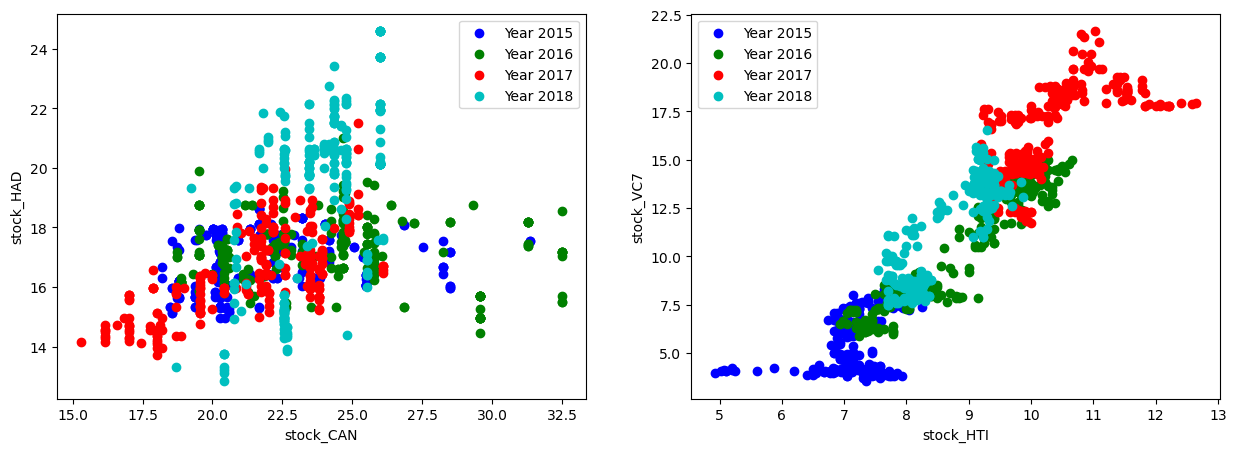

In [58]:
stock_CAN = unclean_pricing.loc[start_date:end_date, "CAN"]
stock_HAD = unclean_pricing.loc[start_date:end_date, "HAD"]
stock_HTI = unclean_pricing.loc[start_date:end_date, "HTI"]
stock_VC7 = unclean_pricing.loc[start_date:end_date, "VC7"]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

ax1.set_xlabel("stock_CAN")
ax1.set_ylabel("stock_HAD")
ax1.scatter(stock_CAN[0:250], stock_HAD[0:250], color='b', label='Year 2015')
ax1.scatter(stock_CAN[250:500], stock_HAD[250:500], color='g', label='Year 2016')
ax1.scatter(stock_CAN[500:750], stock_HAD[500:750], color='r', label='Year 2017')
ax1.scatter(stock_CAN[750:999], stock_HAD[750:999], color='c', label='Year 2018')
ax1.legend()

ax2.set_xlabel("stock_HTI")
ax2.set_ylabel("stock_VC7")
ax2.scatter(stock_HTI[0:250], stock_VC7[0:250], color='b', label='Year 2015')
ax2.scatter(stock_HTI[250:500], stock_VC7[250:500], color='g', label='Year 2016')
ax2.scatter(stock_HTI[500:750], stock_VC7[500:750], color='r', label='Year 2017')
ax2.scatter(stock_HTI[750:999], stock_VC7[750:999], color='c', label='Year 2018')
ax2.legend()

plt.show()

In [59]:
%%HTML
<h3>Daily pricing plot for 2 example optimal pairs</h3>

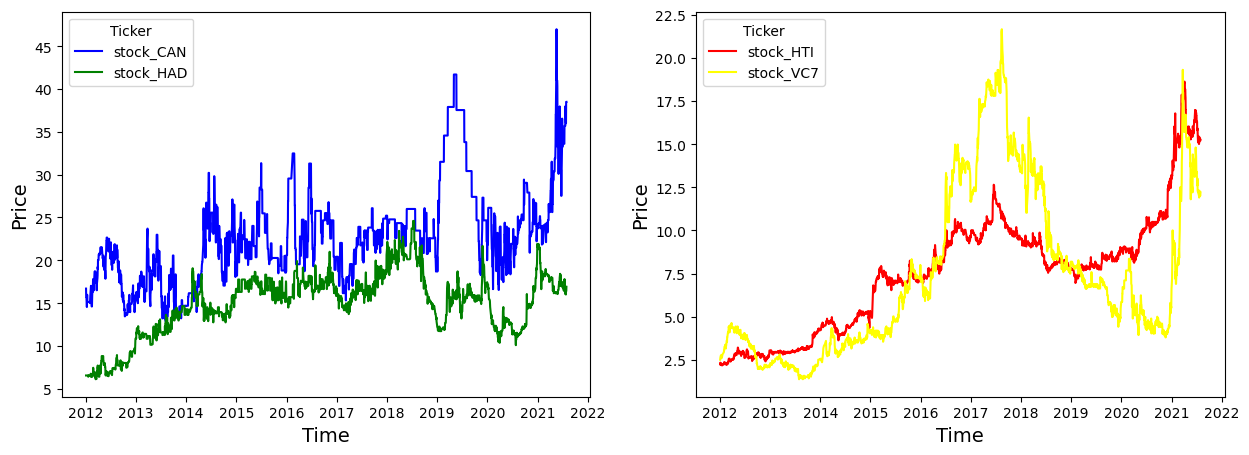

In [60]:
stock_CAN = unclean_pricing.loc[:, "CAN"]
stock_HAD = unclean_pricing.loc[:, "HAD"]
stock_HTI = unclean_pricing.loc[:, "HTI"]
stock_VC7 = unclean_pricing.loc[:, "VC7"]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

ax1.plot(stock_CAN, label='stock_CAN', color='blue')
ax1.plot(stock_HAD, label='stock_HAD', color='green')
ax1.legend(title='Ticker')

#add axes labels and a title
ax1.set_ylabel('Price', fontsize=14)
ax1.set_xlabel('Time', fontsize=14)


ax2.plot(stock_HTI, label='stock_HTI', color='red')
ax2.plot(stock_VC7, label='stock_VC7', color='yellow')
ax2.legend(title='Ticker')

#add axes labels and a title
ax2.set_ylabel('Price', fontsize=14)
ax2.set_xlabel('Time', fontsize=14)

#display plot
plt.show()